# BUILDING A REGRESSION MODEL IN KERAS

## 1. DATA FROM SOURCE AND TOOLS

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

## 2. CLEAN PROCESS AND PREPARE DATA FOR THE MACHINE LEARNING

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.dtypes

Cement                float64
Blast Furnace Slag    float64
Fly Ash               float64
Water                 float64
Superplasticizer      float64
Coarse Aggregate      float64
Fine Aggregate        float64
Age                     int64
Strength              float64
dtype: object

## 3. EXPLORE DATA WITH STATISTICAL METHOD

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


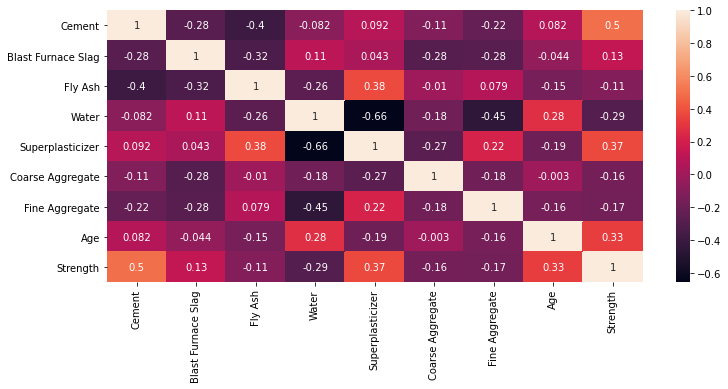

In [10]:
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 4. MODELING TO PREDICT AND FORECAST

In [11]:
X = df.iloc[:,:-1]
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
y = df.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [13]:
n_cols = X.shape[1]
n_cols

8

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## BUILDING A MODEL

### BASELINE MODEL: Hidden Layer 1 / Nodes 10 / Activation - ReLU / Optimizer: Adam / Loss Function: Mean Squared Error / Epochs: 50

In [15]:
pip install keras

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade pip

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [20]:
import keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
mse_A = []
r2_A = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_A.append(mean_squared_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))

In [23]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_A)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_A)))

mse_Mean: 211.70
mse_StdDev: 217.71


In [24]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_A)))

R^2_Mean: 0.23
R^2_StdDev: 0.82


In [25]:
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [26]:
mse_B = []
r2_B = []

for i in range(50):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

   
    model.compile(optimizer='adam', loss='mean_squared_error')

    
    model.fit(X_train, y_train, epochs=50, verbose=0)

    
    y_pred = model.predict(X_test)
    
    mse_B.append(mean_squared_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

In [27]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_B)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_B)))

mse_Mean: 353.19
mse_StdDev: 96.59


In [28]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_B)))

R^2_Mean: -0.26
R^2_StdDev: 0.35


In [ ]:
mse_C = []
r2_C = []

for i in range(50):
    
   
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

   
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    
    model.compile(optimizer='adam', loss='mean_squared_error')

    
    model.fit(X_train, y_train, epochs=100, verbose=0)

    
    y_pred = model.predict(X_test)
    
    mse_C.append(mean_squared_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

In [ ]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_C)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_C)))

In [ ]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_C)))

In [31]:
mse_D = []
r2_D = []

for i in range(50):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    
    model.compile(optimizer='adam', loss='mean_squared_error')

    
    model.fit(X_train, y_train, epochs=100, verbose=0)

    
    y_pred = model.predict(X_test)
    
    mse_D.append(mean_squared_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))

In [32]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_D)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_D)))

mse_Mean: 88.42
mse_StdDev: 23.10


In [33]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_D)))

R^2_Mean: 0.68
R^2_StdDev: 0.09


In [34]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MSE: Mean','MSE: StdDev','R^2: Mean','R^2: StdDev'],
         ['A', round(np.mean(mse_A),2), round(np.std(mse_A),2), round(np.mean(r2_A),2), round(np.std(r2_A),2)],
         ['B', round(np.mean(mse_B),2), round(np.std(mse_B),2), round(np.mean(r2_B),2), round(np.std(r2_B),2)],
         ['C', round(np.mean(mse_C),2), round(np.std(mse_C),2), round(np.mean(r2_D),2), round(np.std(r2_C),2)],
         ['D', round(np.mean(mse_D),2), round(np.std(mse_D),2), round(np.mean(r2_D),2), round(np.std(r2_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MSE: Mean,MSE: StdDev,R^2: Mean,R^2: StdDev
A,211.7,217.71,0.23,0.82
B,353.19,96.59,-0.26,0.35
C,164.21,17.52,0.68,0.07
D,88.42,23.1,0.68,0.09


# CONCLUSIONS

## FROM THE RESULTS ABOVE WE CAN EXTRACT A CONCLUSION:

### WITH THE USE OF: Data Normalizatión + Incresing Epochs + Increasing Hidden Layers

### THE MEAN HAS GONE DOWN, WHILE DE MEAN OF R^2 HAS GONE UP INDICATING THAT THE MODEL ACCURACY ON EACH TRAINING IS GETTING BETTER